# A - Analyse descriptive des variables numériques d'un jeu de données ¶

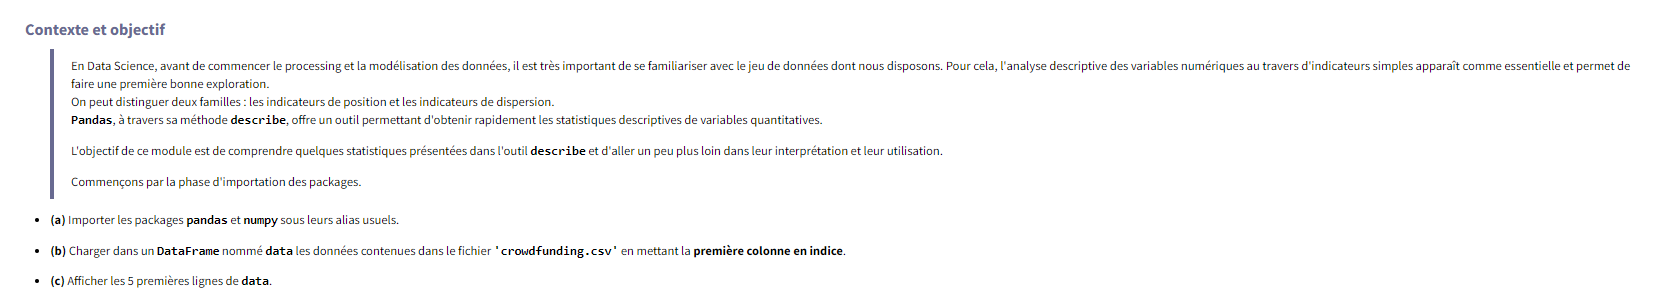

In [2]:
import pandas as pd
import numpy as np

data = pd.read_csv('D:/data/csv/crowdfunding.csv', sep=';', index_col=0)
data.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0.0,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.0,failed,15.0,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.0,failed,3.0,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.0,failed,1.0,US
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.0,failed,14.0,US
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,01/04/2016,50000.0,26/02/2016 13:38,52375.0,successful,224.0,US
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,21/12/2014,1000.0,01/12/2014 18:30,1205.0,successful,16.0,US
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,17/03/2016,25000.0,01/02/2016 20:05,453.0,failed,40.0,US
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,29/05/2014,125000.0,24/04/2014 18:14,8233.0,failed,58.0,US


## Statistiques descriptives 
(a) Déterminer les variables numériques et les stocker dans un tableau num_data.
   On pourra s'aider de la fonction pandas.DataFrame.select_dtypes() et de la méthode include.

In [3]:
data.dtypes

name              object
category          object
main_category     object
currency          object
deadline          object
goal             float64
launched          object
pledged          float64
state             object
backers          float64
country           object
dtype: object

In [4]:
num_data = data.select_dtypes(include=['int64','float64'])
num_data.head()

,goal,pledged,backers
ID,NaN,NaN,NaN
1000002330,1000.0,0.0,0.0
1000003930,30000.0,2421.0,15.0
1000004038,45000.0,220.0,3.0
1000007540,5000.0,1.0,1.0


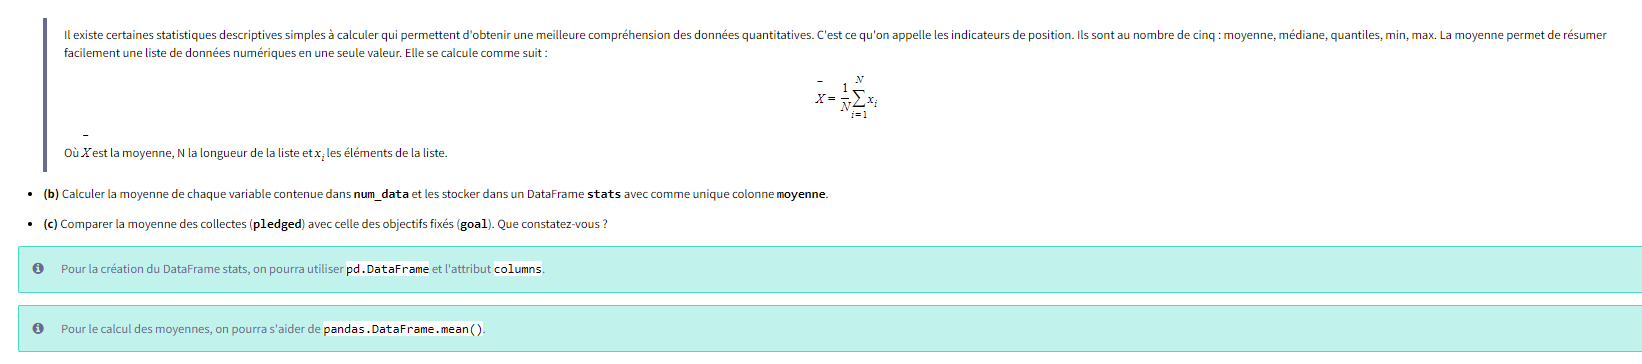

In [5]:
liste = [] # liste vide pour stocker les moyennes des colonnes

for i in num_data.columns:
    liste.append(round(num_data[i].mean(), 2))
    
stats = pd.DataFrame(liste, index=num_data.columns, columns=['moyenne']) 

print("la moyenne des dons est très basse par rapport au objectifs ")
stats.head()

la moyenne des dons est très basse par rapport au objectifs 


,moyenne
goal,24009.40
pledged,11375.86
backers,122.00


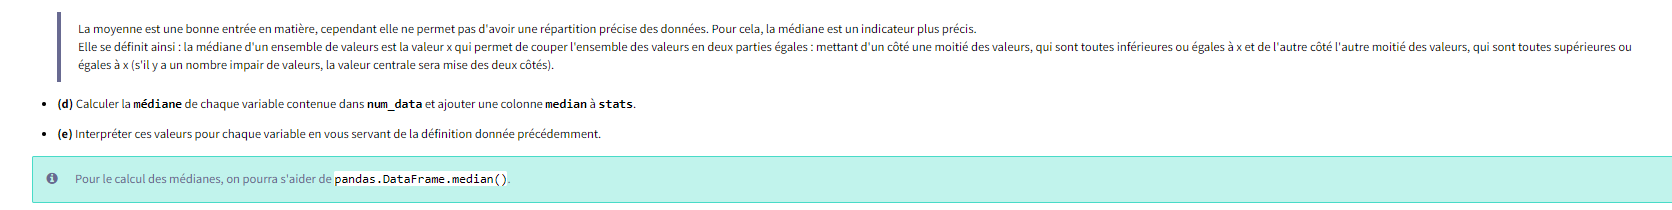

In [6]:
stats_med = pd.DataFrame(num_data.median(), columns=['mediane'])

stats = pd.concat([stats, stats_med], axis=1)
print("medianes et moyennes ont de gros écarts pour toutes ces colonnes, ce qui montre que les données sont très éparpillées et non centrées")

stats.head()

medianes et moyennes ont de gros écarts pour toutes ces colonnes, ce qui montre que les données sont très éparpillées et non centrées


,moyenne,mediane
goal,24009.40,5000.00
pledged,11375.86,682.83
backers,122.00,16.00


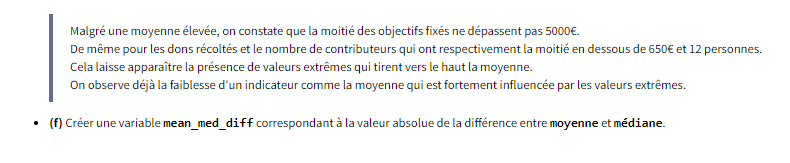

In [7]:
stats['mean_med_diff'] = abs(stats['moyenne'] - stats['mediane'])
stats.head()

,moyenne,mediane,mean_med_diff
goal,24009.40,5000.00,19009.40
pledged,11375.86,682.83,10693.03
backers,122.00,16.00,106.00


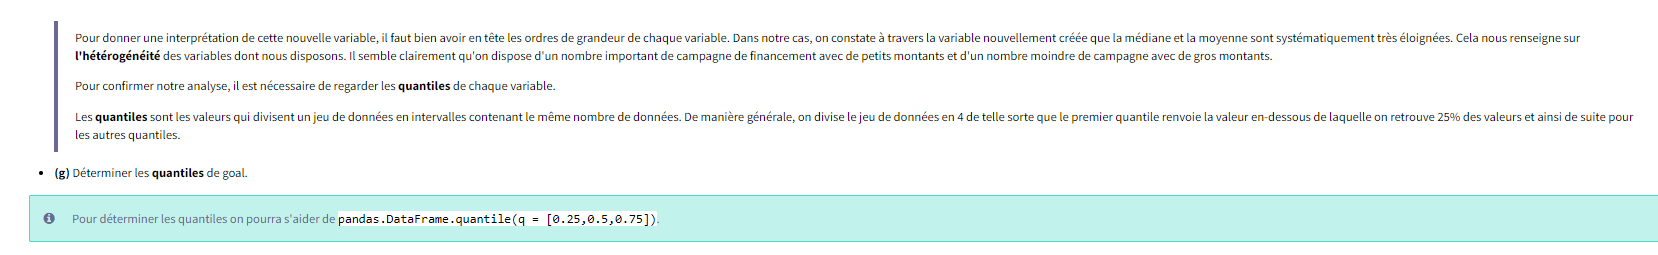

In [8]:
num_data['goal'].quantile(q = [0.25,0.5,0.75])

0.25     2500.0
0.50     5000.0
0.75    23750.0
Name: goal, dtype: float64

(h) Ajouter au tableau stats 3 colonnes q1, q2 et q3 renseignant respectivement le premier, deuxième et troisième quantile de chaque variable numérique.

In [9]:
quantiles_goal = num_data['goal'].quantile(q = [0.25,0.5,0.75])
quantiles_pledged = num_data['pledged'].quantile(q = [0.25,0.5,0.75])
quantiles_backers = num_data['backers'].quantile(q = [0.25,0.5,0.75])
# ce sont toutes des séries qu'il faut transposer

stats[['q1', 'q2', 'q3']] = num_data.quantile(q=[0.25, 0.5, 0.75]).transpose()


In [10]:
stats.head()

,moyenne,mediane,mean_med_diff,q1,q2,q3
goal,24009.40,5000.00,19009.40,2500.000,5000.00,23750.0000
pledged,11375.86,682.83,10693.03,64.095,682.83,7734.8925
backers,122.00,16.00,106.00,3.000,16.00,64.0000


(i) Afficher stats, comparer q2 et q3.
(j) Comparer q3 et la moyenne.
(k) Cela confirme-t-il notre analyse précédente ?

In [11]:
print("cela confirme notre analyse, les données sont très hétérogènes")

cela confirme notre analyse, les données sont très hétérogènes


On peut compléter notre analyse en s'intéressant au min, max de chaque variable.
La différence des deux nous donnera une idée de l'étendue sur laquelle se répartissent les valeurs.

(l) Ajouter au tableau stats 3 colonnes min, max et min_max_diff renseignant le min,le max et la différence des deux.
(m) Que remarquez-vous sur la différence des deux ?

In [12]:
stats['min'] = num_data.min()
stats['max'] = num_data.max()
stats['min_max_diff'] = abs(num_data.min() - num_data.max())
stats.head()

,moyenne,mediane,mean_med_diff,q1,q2,q3,min,max,min_max_diff
goal,24009.40,5000.00,19009.40,2500.000,5000.00,23750.0000,100.0,200000.0,199900.0
pledged,11375.86,682.83,10693.03,64.095,682.83,7734.8925,0.0,94175.0,94175.0
backers,122.00,16.00,106.00,3.000,16.00,64.0000,0.0,840.0,840.0


In [13]:
print("tres grande étendue des données 'goal' et 'pledged' de l'ordre du million !!")

tres grande étendue des données 'goal' et 'pledged' de l'ordre du million !!


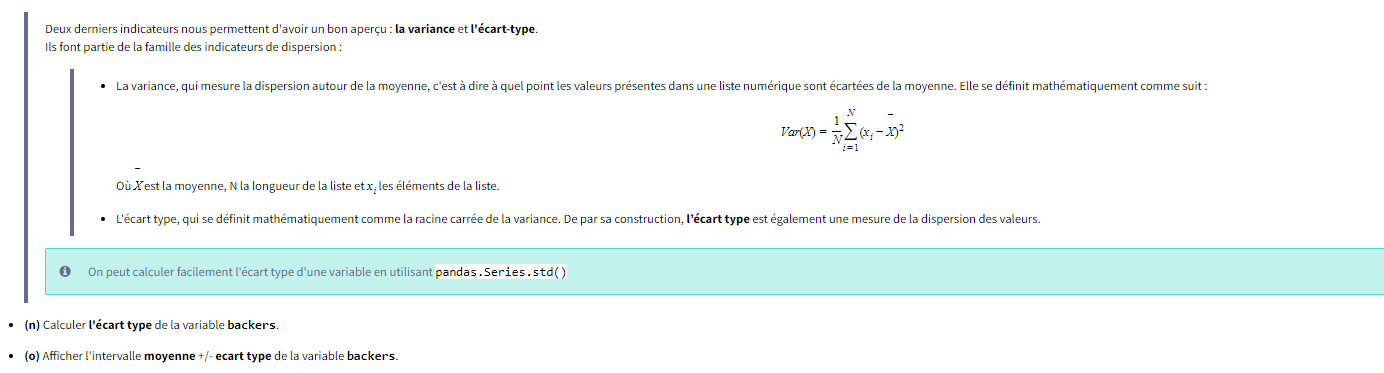

In [14]:
ecart_type = num_data['backers'].std()
intervalle = [round(num_data['backers'].mean() - ecart_type), round(num_data['backers'].mean() + ecart_type)]
print("L'intervalle de confiance de l'écart-type de la variable 'backers' est :", intervalle)

L'intervalle de confiance de l'écart-type de la variable 'backers' est : [-117, 361]


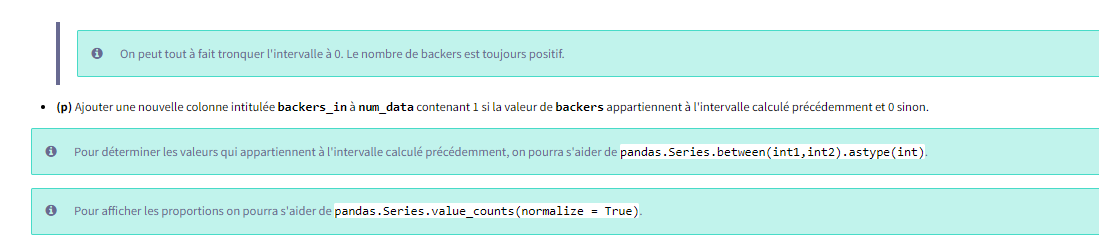

In [15]:
num_data['backers_in'] = num_data['backers'].between(intervalle[0], intervalle[1]).astype(int)
num_data['backers_in'].value_counts(normalize=True)

1    0.83871
0    0.16129
Name: backers_in, dtype: float64

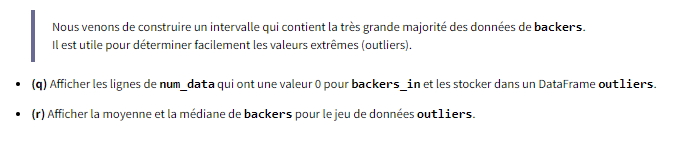

In [16]:
outliers = num_data[num_data.backers_in==0]
outliers.head(10)

,goal,pledged,backers,backers_in
ID,NaN,NaN,NaN,0
1000057089,5000.0,94175.00,761.0,0
1000072011,20000.0,34268.00,624.0,0
1000104688,17757.0,48905.00,571.0,0
100011318,50000.0,57577.31,840.0,0


In [17]:
print("moyenne des outliers de backers ", outliers['backers'].mean())
print("mediane des outliers de backers ",outliers['backers'].median())

moyenne des outliers de backers  699.0
mediane des outliers de backers  692.5


La moyenne est très élevée, bien plus que la moyenne globale trouvée précédemment.
Il en est de même pour la médiane. Ce procédé nous a permis d'identifier les valeurs extrêmes de backers.

(s) Exécuter cette cellule de code.

In [18]:
num_data['labels'] = pd.qcut(num_data['backers'], 4, labels=['q1', 'q2', 'q3', 'q4'])

viz = pd.DataFrame(columns=['q1', 'q2', 'q3', 'q4'], index=[0])

for j in num_data['labels'].unique():
    viz.loc[0,j] = num_data[num_data['labels']==j]['backers'].mean()
    
viz

,q1,q2,q3,q4,NaN
0,0.888889,13.0,38.0,416.625,NaN


Nous avons affiché dans le DataFrame viz, la moyenne des valeurs de chaque quantile. On peut constater une importante différence entre q3 et q4.
Cela signifie que le dernier quart des valeurs évolue sur des valeurs bien plus élevées que le reste. On a une vraie rupture entre q3 et q4.

# B - Analyse descriptive des variables qualitatives d'un jeu de données

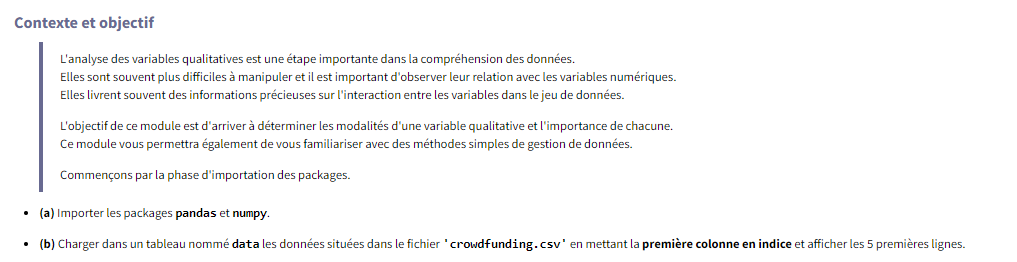

In [19]:
import pandas as pd
import numpy as np

data = pd.read_csv('D:/data/csv/crowdfunding.csv', sep=';', index_col=0)
data.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.0,failed,0.0,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.0,failed,15.0,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.0,failed,3.0,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.0,failed,1.0,US
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.0,failed,14.0,US
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,01/04/2016,50000.0,26/02/2016 13:38,52375.0,successful,224.0,US
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,21/12/2014,1000.0,01/12/2014 18:30,1205.0,successful,16.0,US
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,17/03/2016,25000.0,01/02/2016 20:05,453.0,failed,40.0,US
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,29/05/2014,125000.0,24/04/2014 18:14,8233.0,failed,58.0,US


## Analyse descriptive 
(a) Déterminer les variables catégorielles et les stocker dans un tableau cat_data.
   On pourra s'aider de la fonction pandas.DataFrame.select_dtypes() et de l'attribut include auquel on renseignera une liste du ou des type(s) qu'on souhaite garder (ici 'O').

In [20]:
data.dtypes
cat_data = num_data = data.select_dtypes(include=['O'])
cat_data.head()


,name,category,main_category,currency,deadline,launched,state,country
ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,11/08/2015 12:12,failed,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,02/09/2017 04:43,failed,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,12/01/2013 00:20,failed,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,17/03/2012 03:24,failed,US


L'analyse descriptive des variables qualitatives fait appel à d'autres outils de pandas.
Une première question qu'on doit se poser quand on fait face à ce type de données est : Quelles sont les modalités de chaque variable et comment se répartissent-elles ?

(b) Afficher les modalités de la variable main_category avec leurs fréquences respectives.
(c) Quelle est la variable la plus fréquente ?
   On pourra s'aider de pandas.Series.value_counts().
   
   !!    value_counts ne s'utilise pas sur des objets de type DataFrame.

In [21]:
cat_data['main_category'].value_counts(normalize=True)

Film & Video    0.200000
Food            0.166667
Music           0.133333
Publishing      0.100000
Comics          0.100000
Design          0.066667
Crafts          0.066667
Games           0.066667
Fashion         0.066667
Theater         0.033333
Name: main_category, dtype: float64

value_counts est couramment utilisé pour visualiser très rapidement les modalités d'une variable qualitative.
On peut également retrouver très facilement la modalité la plus fréquente d'une variable qualitative : la méthode mode permet de récupérer l'élément le plus fréquent à l'intérieur d'une pandas.Series.

(d) Utiliser la méthode mode pour récupérer la modalité la plus fréquente de main_category.
(e) Vérifier que cela correspond bien avec le value_counts exécuté précédemment.

In [22]:
cat_data['main_category'].mode()

0    Film & Video
Name: main_category, dtype: object

Dans ce jeu de données, nous disposons d'une variable binaire state qui renseigne sur la réussite ou l'échec de la collecte.
Ces variables sont généralement très intéressantes à étudier et livrent des informations précieuses sur les jeux de données. Il est important de bien les identifier et d'étudier dans un premier temps la fréquence des modalités.

(f) Afficher les fréquences des modalités de la variable state.

In [23]:
cat_data['state'].value_counts(normalize=True)

failed        0.633333
successful    0.366667
Name: state, dtype: float64

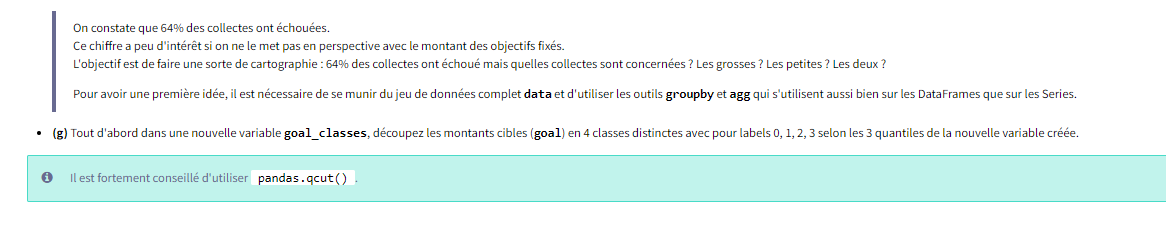

In [24]:
data['goal_classes'] = pd.qcut(data['goal'], labels=[0, 1, 2, 3], q=4)
data['goal_classes'].head()

ID            NaN
1000002330      0
1000003930      3
1000004038      3
1000007540      1
Name: goal_classes, dtype: category
Categories (4, int64): [0 < 1 < 2 < 3]

(h) En utilisant groupby et agg, stocker dans state_summary les montants cibles (goal) en fonction des variables goal_classes et state.
   Exemple d'utilisation : df.groupby(['Age','sex']).agg({'salaire':'sum'}).

In [25]:
state_summary = data.groupby(['goal_classes', 'state']).agg({'goal': 'sum'})
state_summary

goal
goal_classes state               
0            failed       10500.0
             successful    1525.0
1            failed       21500.0
             successful    5000.0
2            failed       31500.0
             successful   60257.0
3            failed      490000.0
             successful  100000.0

Le montant en lui-même ne nous apporte aucune information.
Il faut l'affiner en le présentant par exemple sous forme de pourcentage.

(i) Exécuter la cellule de code suivante (une seule fois).

In [26]:
for i in [0,1,2,3]:
    tot = data[data['goal_classes']==i].sum()
    state_summary.loc[i, 'failed'] = state_summary.loc[i, 'failed']/tot
    state_summary.loc[i, 'successful'] = state_summary.loc[i, 'successful']/tot

C:\Users\user\AppData\Local\Temp\ipykernel_10928\2925614990.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  tot = data[data['goal_classes']==i].sum()


state_summary affiche désormais les pourcentages de réussite ou d'échec suivant les quartiles où on se place.

(j) Que remarquez-vous ?

In [27]:
print("avec les pourcentages, on remarque que plus le but est élevé, plus l'échec est grand.")
state_summary

avec les pourcentages, on remarque que plus le but est élevé, plus l'échec est grand.


goal
goal_classes state               
0            failed      0.873181
             successful  0.126819
1            failed      0.811321
             successful  0.188679
2            failed      0.343298
             successful  0.656702
3            failed      0.830508
             successful  0.169492

(k) Ajouter à state_summary l'information relative au champ backers.

In [29]:
state_summary['backers'] = data.groupby(['goal_classes', 'state']).agg({'backers': 'sum'})['backers']
state_summary

goal  backers
goal_classes state                        
0            failed      0.873181     31.0
             successful  0.126819    116.0
1            failed      0.811321     73.0
             successful  0.188679    761.0
2            failed      0.343298     14.0
             successful  0.656702   1442.0
3            failed      0.830508    159.0
             successful  0.169492   1064.0

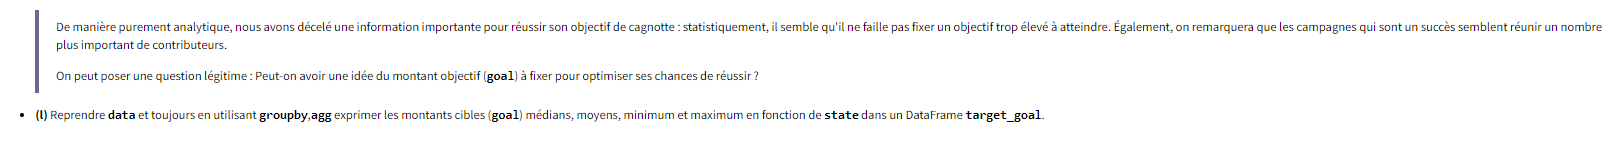

In [30]:
target_goal = data.groupby(['state']).agg({'goal': ['median','mean','min','max']})
target_goal

goal                               
             median          mean    min       max
state                                             
failed       5000.0  29131.578947  500.0  200000.0
successful  10000.0  15162.000000  100.0   50000.0

(m) En vous appuyant sur le module précédent (hétérogénéité, étendue des variables), est-il possible selon vous d'avoir une idée précise à priori du montant objectif à fixer pour réussir une collecte ?

In [ ]:
'''
trop d'écarts entre les données statistiques pour avoir une idée précise d'un objectif plus réaliste
'''

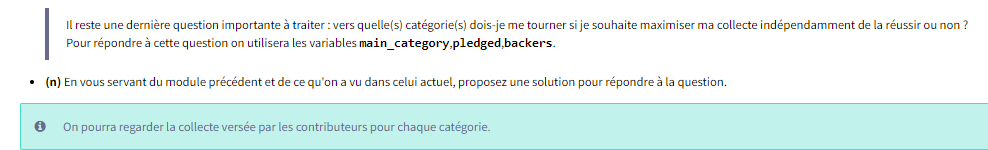

In [31]:
soluce = data.groupby(['main_category']).agg({'pledged': 'sum','backers': 'sum'})
soluce['pledged_per_backers'] = soluce['pledged']/soluce['backers']

soluce

#La solution proposée regarde la collecte versée, le nombre de contributeurs ainsi que la somme versée en moyenne par chaque contributeur.
#L'objectif est de déterminer le couple pledged/pledged_per_backers optimal pour maximiser sa collecte
#Games semble présenter la combinaison idéale avec la plus forte collecte et un solide ratio par contributeur


,pledged,backers,pledged_per_backers
main_category,,,
Comics,1209.04,109.0,11.092110
Crafts,0.00,0.0,NaN
Design,8897.00,69.0,128.942029
Fashion,34269.00,625.0,54.830400
Film & Video,116646.88,1486.0,78.497227
Food,55862.00,323.0,172.947368
Games,94175.00,761.0,123.751643
Music,28778.00,255.0,112.854902
Publishing,789.00,20.0,39.450000


# C - Analyse des liaisons entre les variables d'un jeu de données

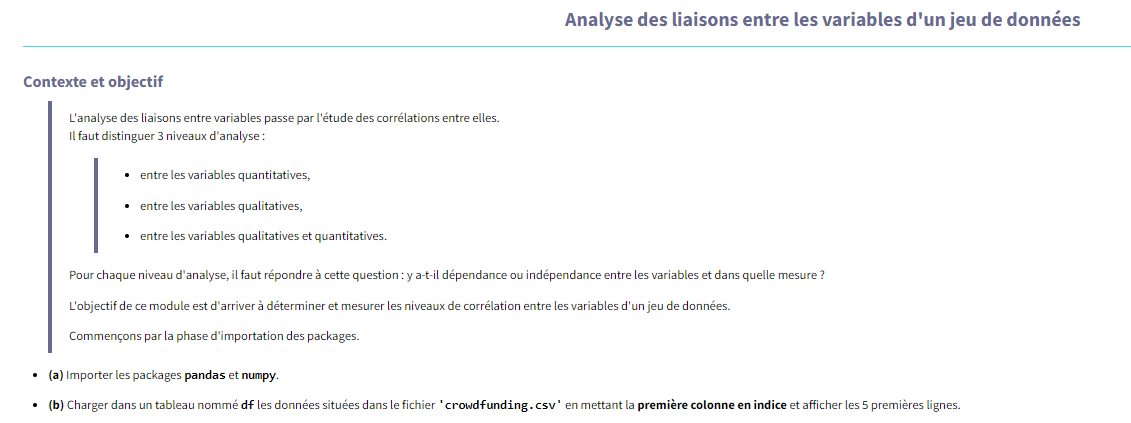

In [36]:
import pandas as pd
import numpy as np

df = pd.read_csv('D:/data/csv/crowdfunding.csv', sep=';', index_col=0)
df.head(10)

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country
ID,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,09/10/2015,1000.0,11/08/2015 12:12,0.00,failed,0,GB
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,01/11/2017,30000.0,02/09/2017 04:43,2421.00,failed,15,US
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,26/02/2013,45000.0,12/01/2013 00:20,220.00,failed,3,US
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,16/04/2012,5000.0,17/03/2012 03:24,1.00,failed,1,US
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,29/08/2015,19500.0,04/07/2015 08:35,1283.00,failed,14,US
1000014025,Monarch Espresso Bar,Restaurants,Food,USD,01/04/2016,50000.0,26/02/2016 13:38,52375.00,successful,224,US
1000023410,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,21/12/2014,1000.0,01/12/2014 18:30,1205.00,successful,16,US
1000030581,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,17/03/2016,25000.0,01/02/2016 20:05,453.00,failed,40,US
1000034518,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,29/05/2014,125000.0,24/04/2014 18:14,8233.00,failed,58,US


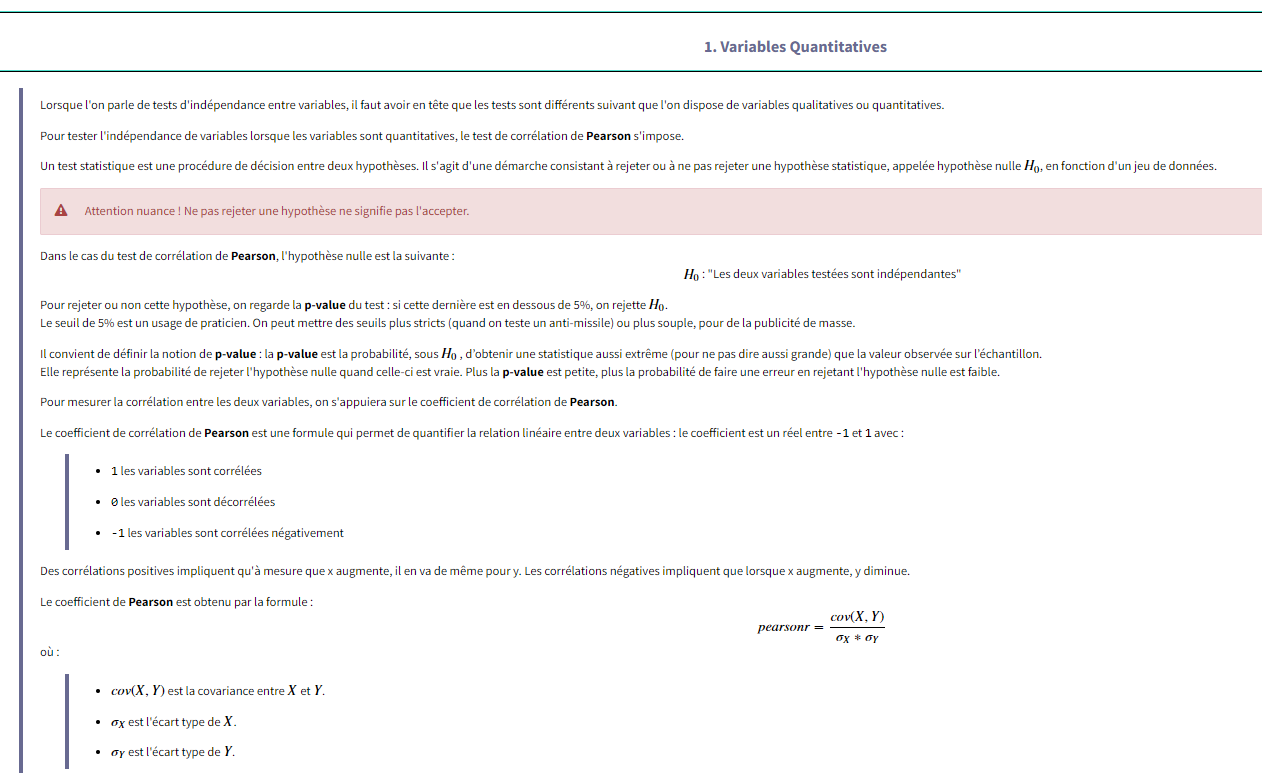

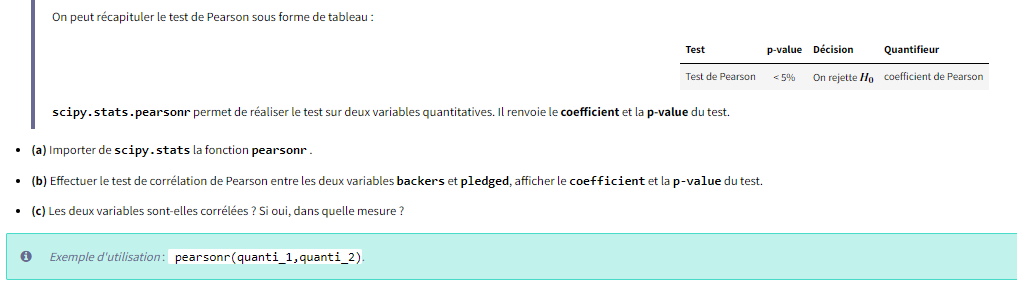

In [37]:
from scipy.stats import pearsonr

backers = df['backers'].to_numpy()
pledged = df['pledged'].to_numpy()
coef_pears  = pearsonr(backers, pledged)[0]
p_value  = pearsonr(backers, pledged)[1]
print("le Coefficient de corrélation de Pearson est de ", coef_pears," et la p-value est de ",p_value)
print("les 2 variables sont fortement corrélées et varient ensemble dans le meme sens")


le Coefficient de corrélation de Pearson est de  0.911000172157125  et la p-value est de  2.761487654032058e-12
les 2 variables sont fortement corrélées et varient ensemble dans le meme sens


On peut vérifier cette relation également graphiquement.

(d) Exécuter la cellule suivante.

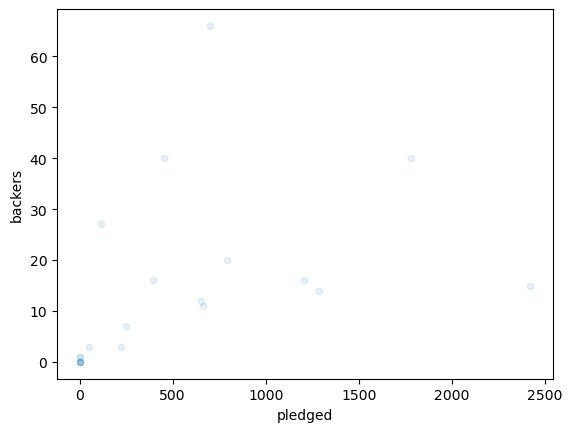

In [38]:
from pandas.plotting import scatter_matrix
%matplotlib inline

df[df['pledged']<4233].plot(kind='scatter', x='pledged', y='backers', alpha=0.1);


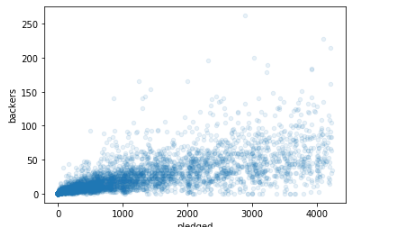

La matrice de corrélation déjà implémentée dans la bibliothèque Pandas renvoie un dataframe contenant les coefficients de corrélation de pearson entre chaque variable quantitative et les autres.

Elle est facilement calculable à l'aide de la méthode corr.

(e) Afficher la matrice de corrélation de df.
(f) Que pouvez-dire des corrélations entre pledged et goal ? Entre backers et goal ?

In [39]:
df.corr()
print("pas de corrélation entre pledged et goal ou entre backers et goal")

pas de corrélation entre pledged et goal ou entre backers et goal


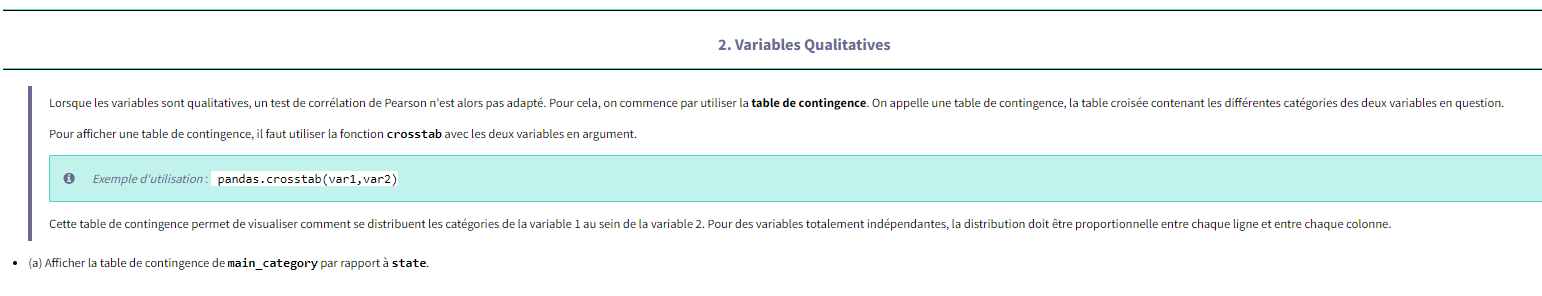

In [40]:
table = pd.crosstab(df['main_category'], df['state'])
table

state,failed,successful
main_category,,
Comics,1,2
Crafts,2,0
Design,2,0
Fashion,1,1
Film & Video,4,2
Food,3,2
Games,1,1
Music,1,3
Publishing,3,0


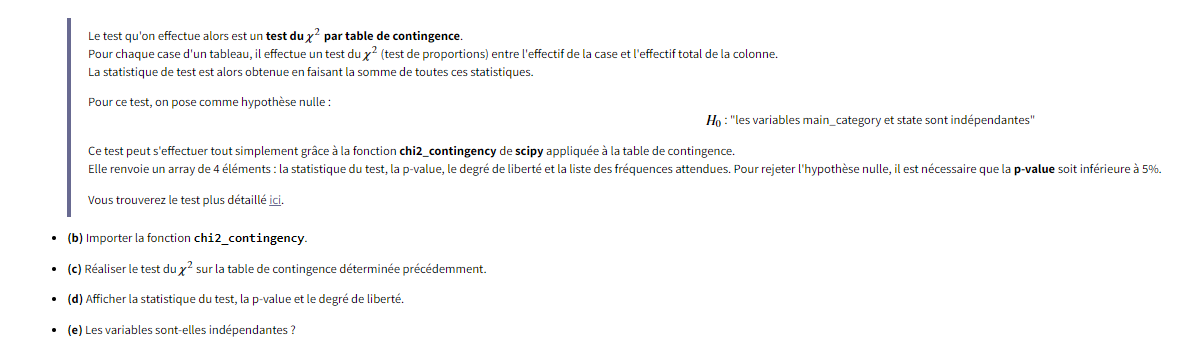

In [41]:
from scipy.stats import  chi2_contingency

resultat = chi2_contingency(table)  
statistique = resultat[0]
p_valeur = resultat[1]
degre_liberte = resultat[2]
print(statistique, p_valeur, degre_liberte)
print("les variables ont une dépendance significative")

8.68421052631579 0.4669199987948369 9
les variables ont une dépendance significative


In [ ]:
""" real
428.19500588153704 1.436342959289544e-82 14
les variables ont une dépendance significative dépendantes
"""

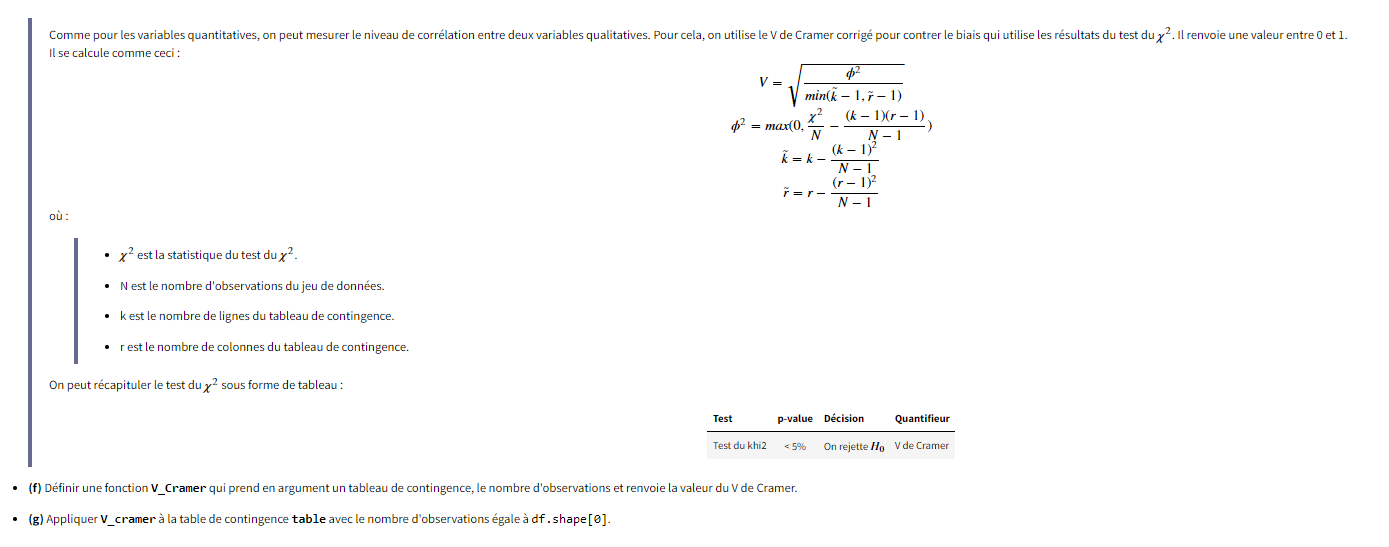

In [42]:
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, df.shape[0])  # real 0.2035...

0.0

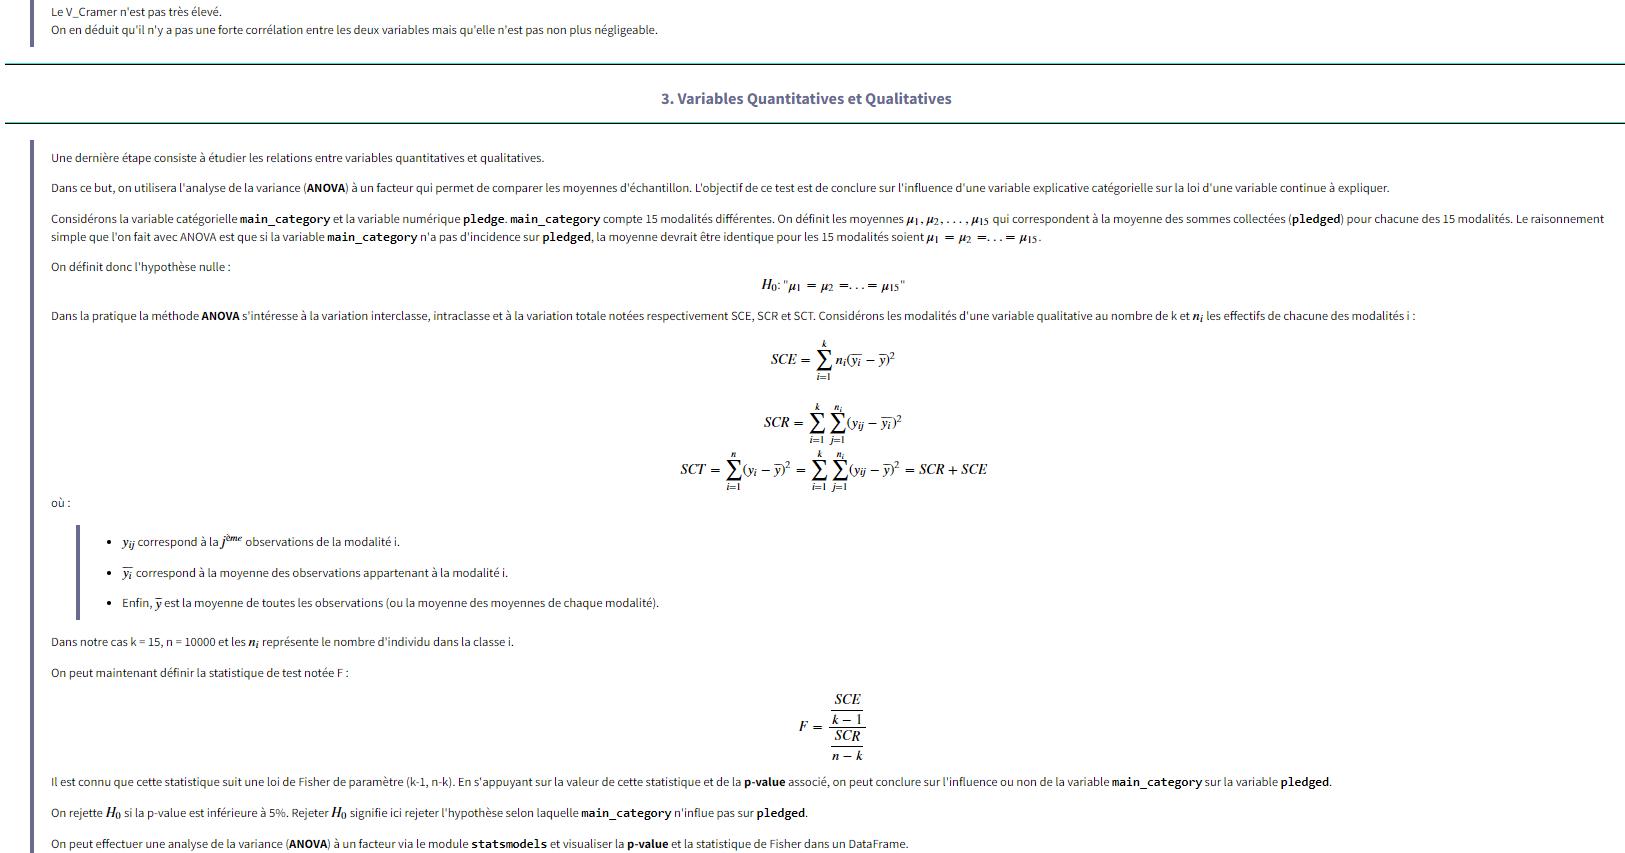

(a) Importer le module statsmodels.api.
(b) Via l'utilisation d'ANOVA étudier la relation entre pledged et main_category.
(c) Afficher les résultats, observer la p_value (PR>F) et conclure.
   Exemple d'utilisation :  result = statsmodels.formula.api.ols('var_num ~ var_cat', data = df).fit()  table = statsmodels.api.stats.anova_lm(result)

In [43]:
import statsmodels.api 

result = statsmodels.formula.api.ols('pledged ~ main_category', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)
table

,df,sum_sq,mean_sq,F,PR(>F)
main_category,9.0,4.278940e+09,4.754377e+08,0.875167,0.562032
Residual,20.0,1.086507e+10,5.432536e+08,NaN,NaN


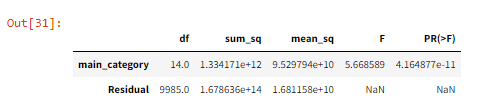

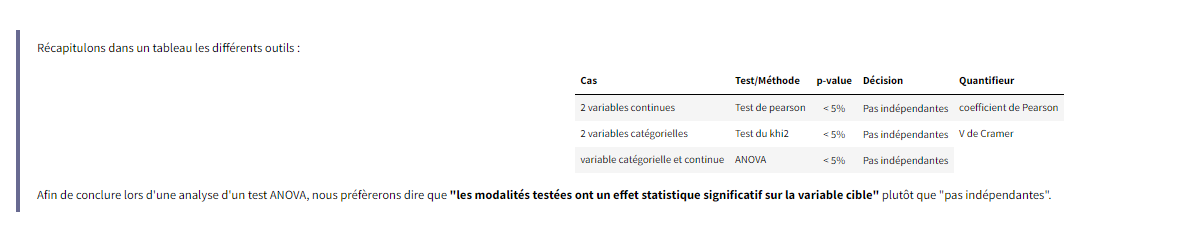